## Importing libraries

In [ ]:
import pandas as pd             # data manipulation
import numpy as np              # numerical operation
import matplotlib.pyplot as plt #basic plotting
import seaborn as sns           #statistical visulaization

sns.set(color_codes=True)       # allows for use of shorthand color codes

## Loading Our Data

In [ ]:
# mount Google Drive
from google.colab import drive
import os

#Mount Google Drive
drive.mount('/content/drive', force_remount=True)

#Specify folder you want to access
project_folder = '/content/drive/My Drive/Colab Notebooks'

Mounted at /content/drive


In [ ]:
file_path = os.path.join(project_folder, "Titanic-Dataset.csv")

df = pd.read_csv(file_path)

## What's in the data?

In [ ]:
# dimensions of the dataframe
print(df.shape)

# display the top  rows
df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# display the last 5 rows
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Whatare possible values of pclass?

In [ ]:
min_pclass = df['Pclass'].min()
max_pclass = df['Pclass'].max()
print(f"Min passenger class: {min_pclass}")
print(f"Max passenger class: {max_pclass}")

Min passenger class: 1
Max passenger class: 3


In [ ]:
# look at the data structure
# What are the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## What pattern exit in the data?

In [ ]:
# Basic statistical summary
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


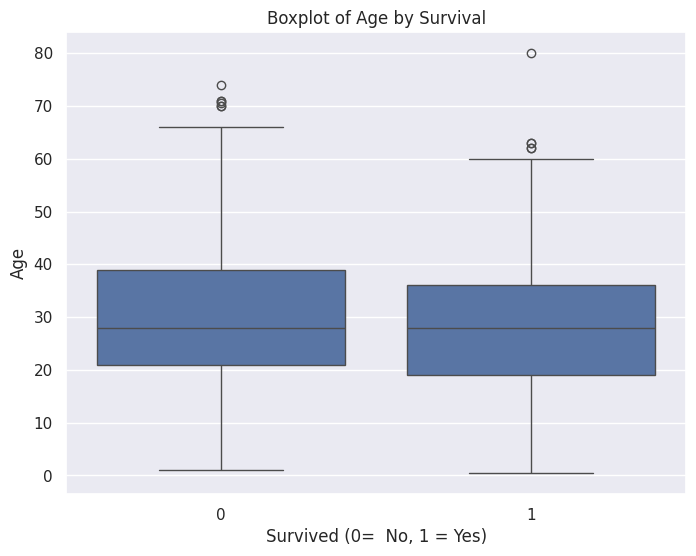

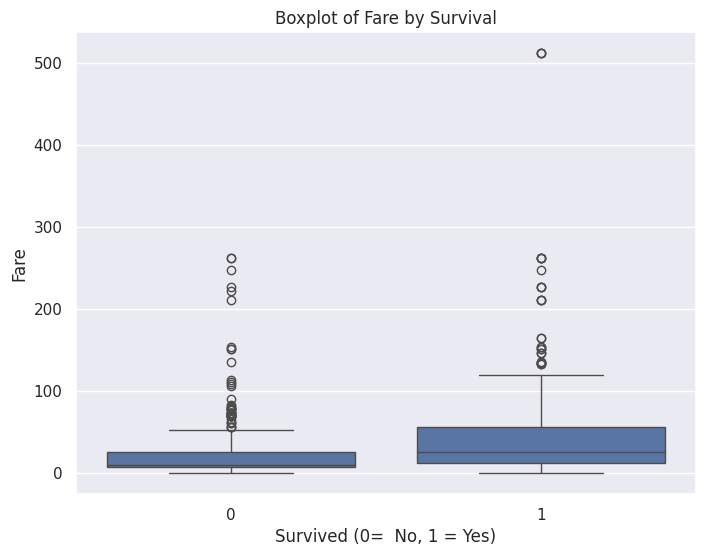

In [ ]:
# create a boxplot for age
plt.figure(figsize=(8,6)) #adjust figure size
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Boxplot of Age by Survival')
plt.xlabel('Survived (0=  No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8,6)) #adjust figure size
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Boxplot of Fare by Survival')
plt.xlabel('Survived (0=  No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

In [ ]:
def generate_bar_chart(data, column):

  plt.figure(figsize=(10,6)) #specify dimensions of visualization

  if column in ["Fare", "Age"]:
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)

  else:
    sns.countplot(x=column, data=data)
    plt.title(f"Count frequncy of {column}", fontsize=16)
    plt.xlabel(column, fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)

  plt.tight_layout()
  plt.show()

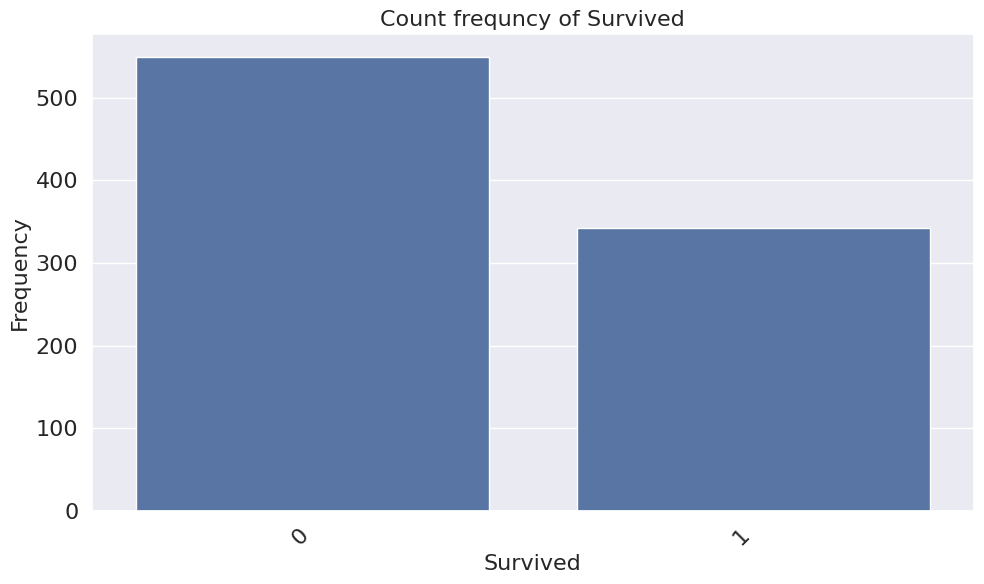

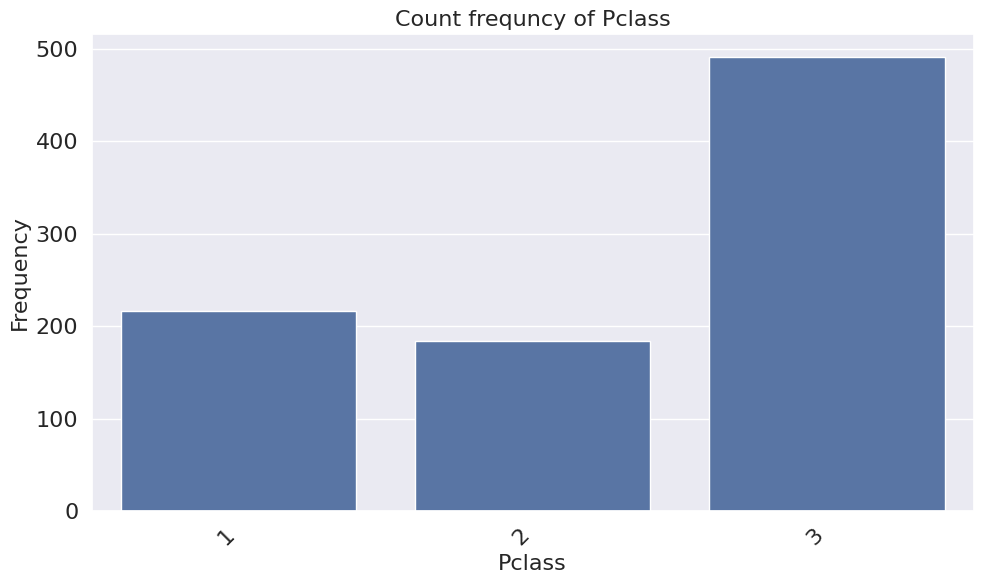

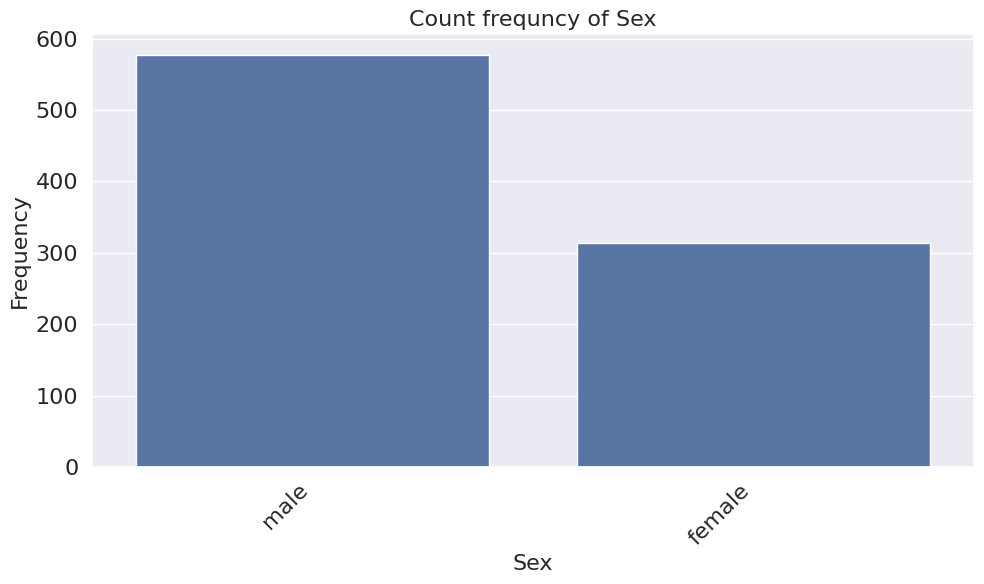

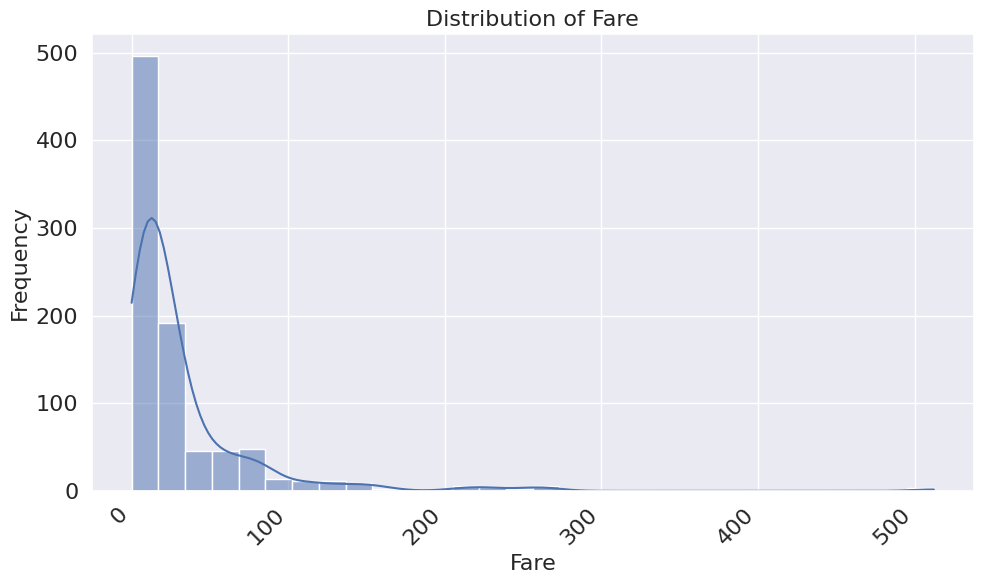

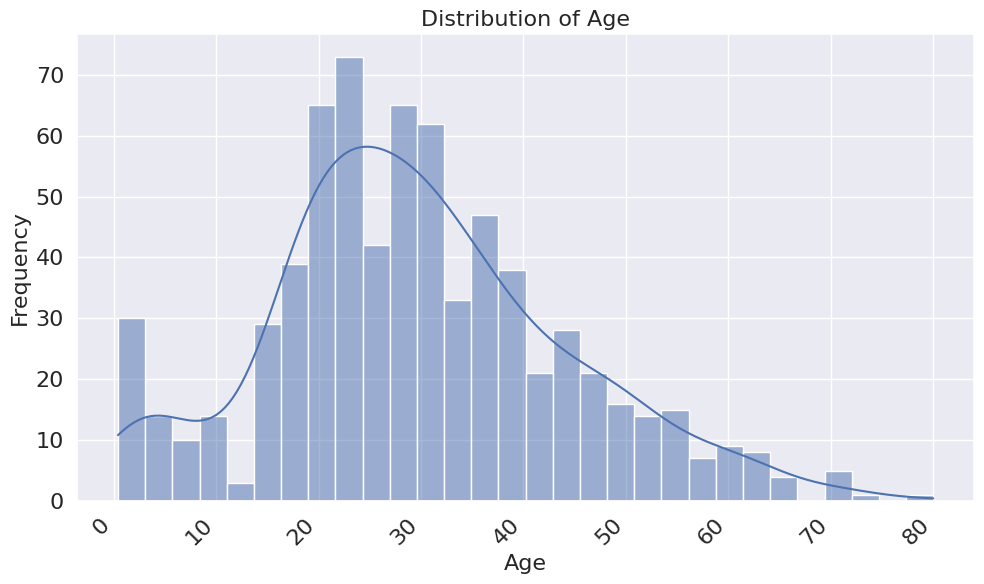

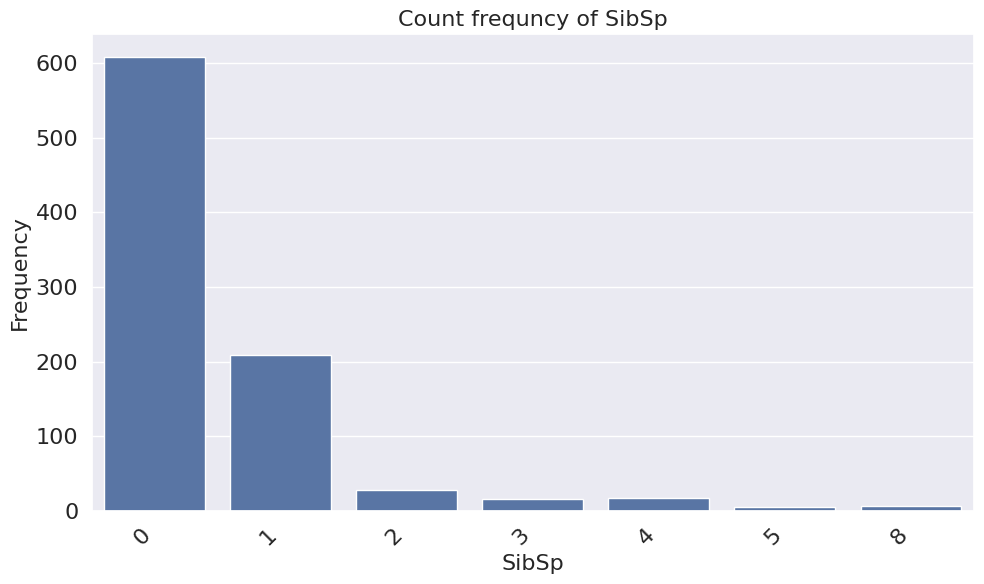

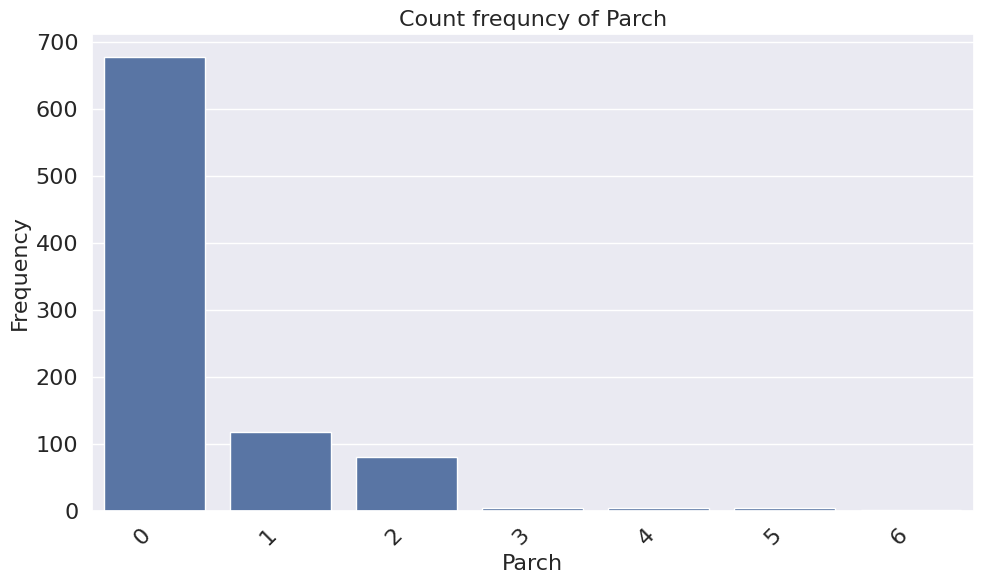

In [ ]:
columns_to_plot = ['Survived', 'Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch']

for column in columns_to_plot:
  generate_bar_chart(df, column)

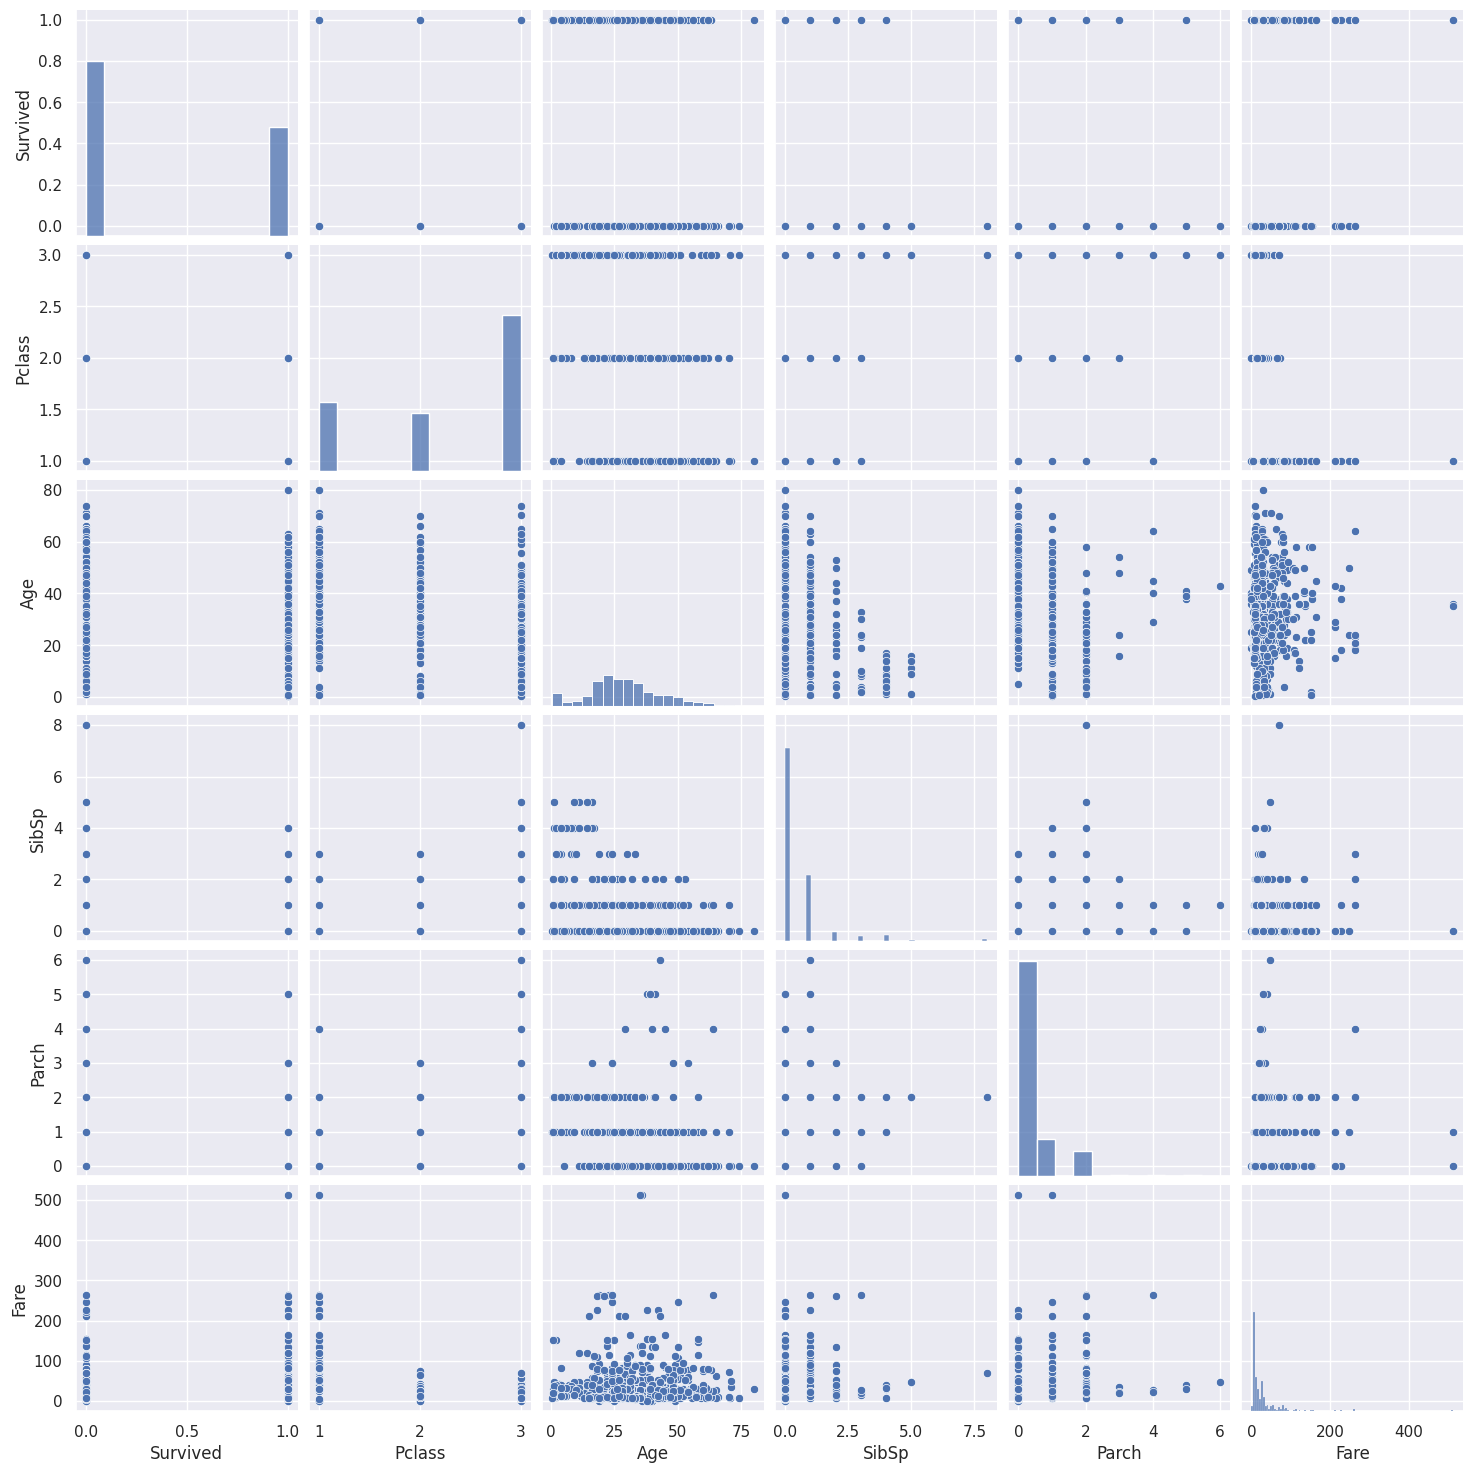

In [ ]:
sns.pairplot(df, vars=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

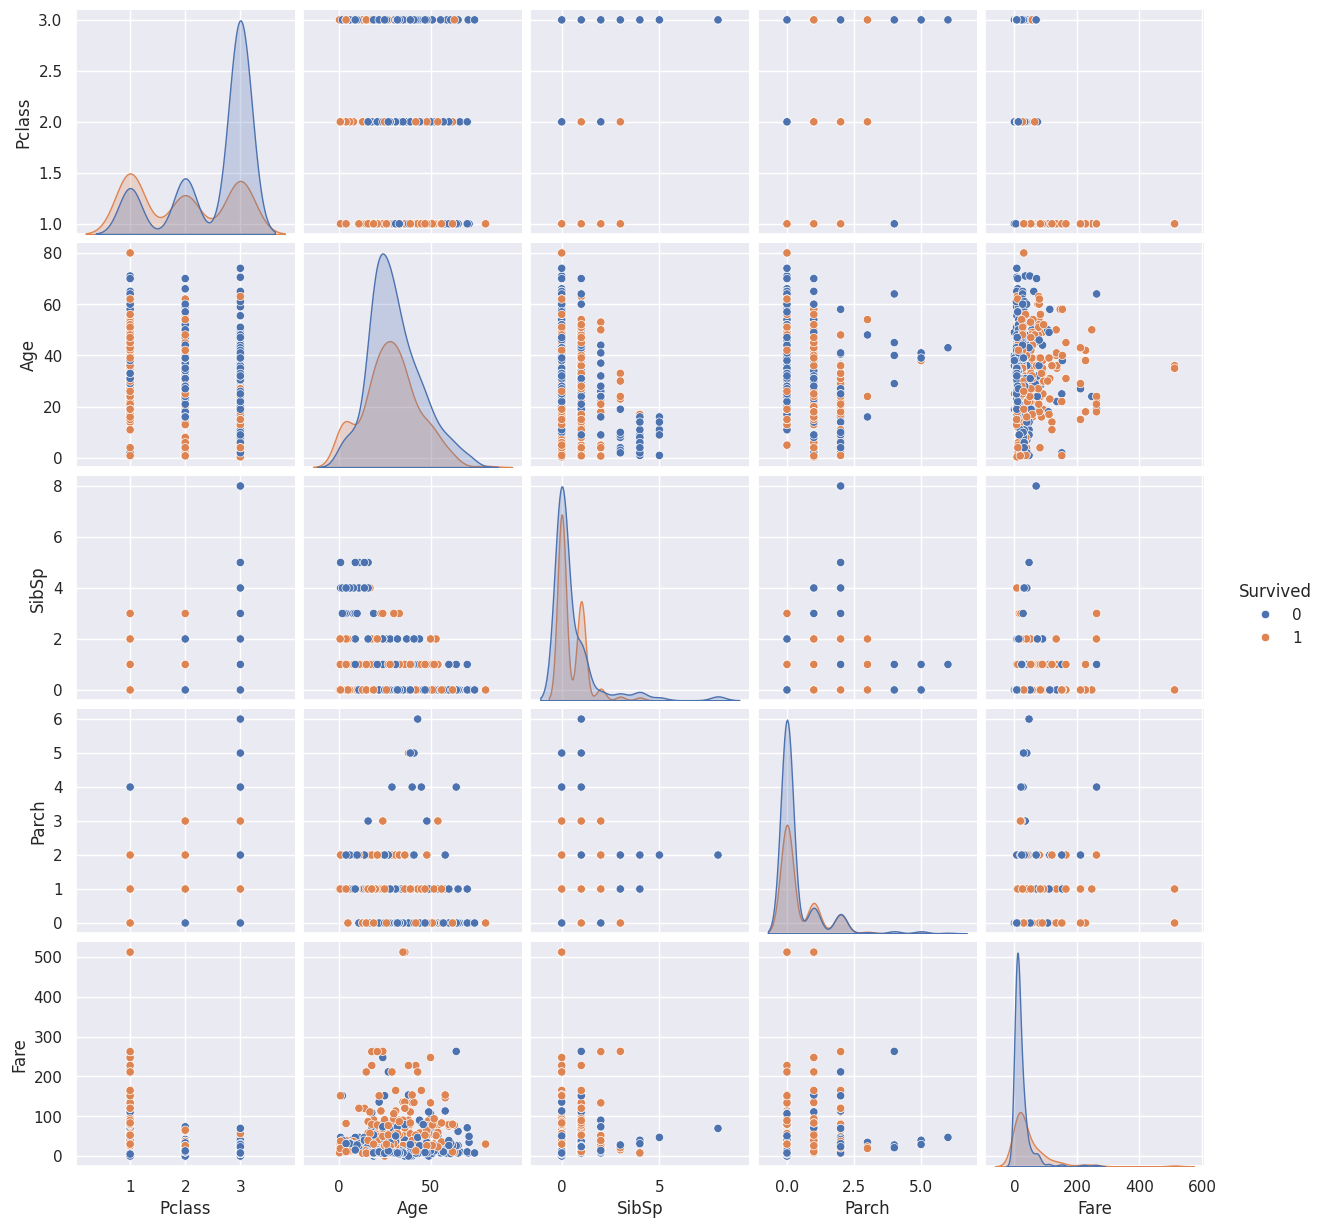

In [ ]:
sns.pairplot(df, hue='Survived', vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [ ]:
num_null_age = df['Age'].isnull().sum()
print(f"Number of null values in Age: {num_null_age}")

median_age_by_group = df.groupby(['Sex', 'Pclass'])['Age'].median()
print(median_age_by_group)

def fill_age(row):
  if pd.isnull(row['Age']):
    return median_age_by_group.loc[row['Sex'], row['Pclass']]
  else:
    return row['Age']

df['Age'] = df.apply(fill_age, axis=1)

num_null_age = df['Age'].isnull().sum()
print(f"Number of null values in Age: {num_null_age}")

#Apply function to fill missing values

Number of null values in Age: 177
Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64
Number of null values in Age: 0


In [ ]:
#Example bins for Age
df['Age_Binned'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Middle_Aged', 'Senior'])

#Example bins for Fare
df['Fare_Binned'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High']) #Quartile-based binning

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Binned,Fare_Binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle_Aged,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Medium


In [ ]:
# Compute survival rates for Age and Fare bins
age_fare_bins_survival = df.groupby(['Age_Binned', 'Fare_Binned'], observed=False)['Survived'].mean().unstack()
print(age_fare_bins_survival)

# Find age group with highest survival rate for each fare category
max_survival_age_group_bins = age_fare_bins_survival.idxmax()
print("\nAge group with the highest survival rate for each Fare category:\n")
print(max_survival_age_group_bins)

Fare_Binned       Low    Medium      High  Very High
Age_Binned                                          
Child             NaN  0.888889  0.600000   0.440000
Teenager     0.277778  0.458333  0.300000   0.611111
Adult        0.222857  0.250000  0.481132   0.651685
Middle_Aged  0.000000  0.255814  0.378788   0.580247
Senior       0.000000  0.500000  0.200000   0.222222

Age group with the highest survival rate for each Fare category:

Fare_Binned
Low          Teenager
Medium          Child
High            Child
Very High       Adult
dtype: category
Categories (5, object): ['Child' < 'Teenager' < 'Adult' < 'Middle_Aged' < 'Senior']


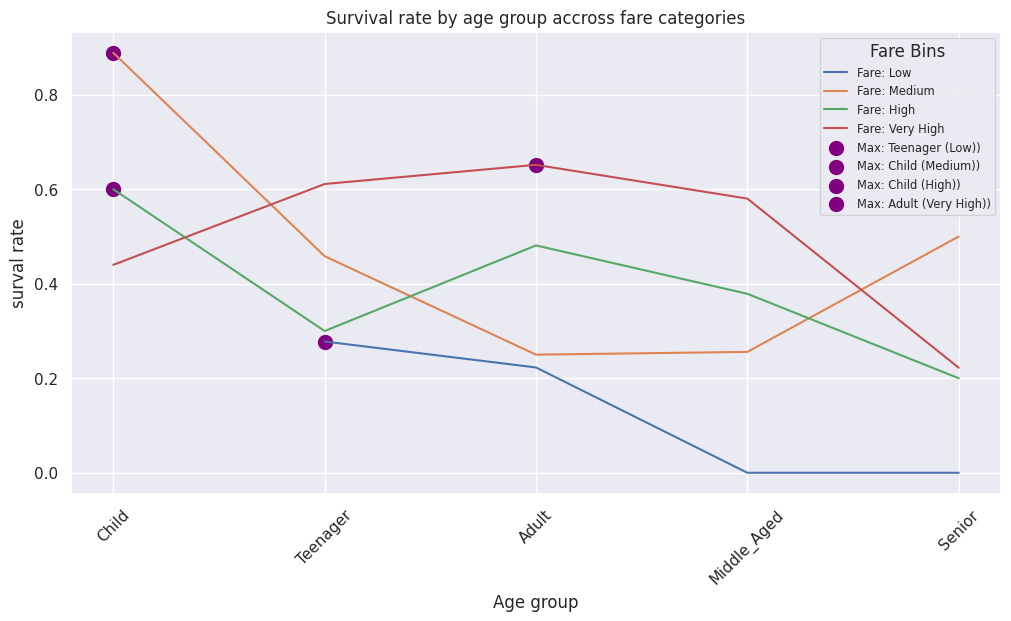

In [ ]:
# Plot Survival Rate Trends
plt.figure(figsize=(12, 6))

#First: Plot multiple survical rate lines for each Fare bin

#loop through each fare bin category
for fare_bin in age_fare_bins_survival.columns:
  #plot a line showing survical rates for each age bin within the given Fare bin
  plt.plot(age_fare_bins_survival.index, #x-axis
           age_fare_bins_survival[fare_bin], #y-axis
           label=f'Fare: {fare_bin}') #label for legend

for fare_bin in age_fare_bins_survival.columns:
  max_age_group = max_survival_age_group_bins[fare_bin]

  max_survival_rate = age_fare_bins_survival.loc[max_age_group, fare_bin]

  plt.scatter(max_age_group, max_survival_rate, color='purple', s=100, label=f'Max: {max_age_group} ({fare_bin}))')

#third: add labels to plot

plt.title('Survival rate by age group accross fare categories')
plt.xlabel('Age group')
plt.ylabel('surval rate')
plt.legend(title='Fare Bins', loc="upper right", fontsize='x-small')
plt.grid(True)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Get number if children in each dare bin
age_fare_counts = pd.crosstab(df['Age_Binned'], df['Fare_Binned'])
print(age_fare_counts.loc['Child'])

# Get edges of  fare bins
fare_bins, bin_edges = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', "High", 'Very_High'], retbins=True)

# Another way to assign binned values to df
# df['Fare_Binned'] = fare_bins

print(bin_edges)

Fare_Binned
Low           0
Medium        9
High         35
Very High    25
Name: Child, dtype: int64
[  0.       7.9104  14.4542  31.     512.3292]
